# Q1

In [1]:
## Load dataset 

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
breast_cancer_data = datasets.load_breast_cancer()
df = breast_cancer_data.data

labels = breast_cancer_data.target

In [2]:
# Reshaping labels to append to dataframe 

labels = np.reshape(labels,(569,1))

In [3]:
breast_cancer_df = np.concatenate([df, labels], axis=1)

In [4]:
# converting to dataframe 

breast_cancer_df = pd.DataFrame(breast_cancer_df)

In [5]:
features = breast_cancer_data.feature_names

In [6]:
# Adding label column name

features_labels = np.append(features, "label")

#Adding the labels to the dataframe columns 
breast_cancer_df.columns = features_labels

In [7]:
#Separate features and target variables
X = breast_cancer_df.loc[:, features].values
y = breast_cancer_df.loc[:, 'label'].values

#Normalising data using StandardScaler
from sklearn.preprocessing import StandardScaler
#x = breast_cancer_df.loc[:, features].values
#x = StandardScaler().fit_transform(x)

In [8]:
#3 Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
random_state = 0)

In [9]:
#4 performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
#5 Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


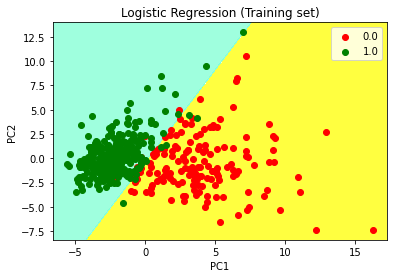

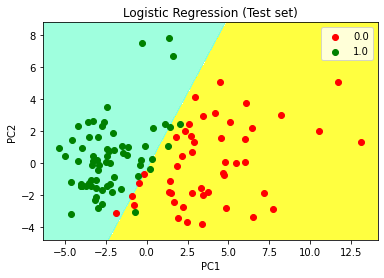

In [11]:
#6 Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#7 Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

#8 making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#9 Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()


#10 Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

# Q2 

## Neural network calculations

![1](ForwardPass_Page_1.jpg)

![2](ForwardPass_Page_2.jpg)

![3](ForwardPass_Page_3.jpg)

![4](ForwardPass_Page_4.jpg)

![5](ForwardPass_Page_5.jpg)

![6](ForwardPass_Page_6.jpg)

![7](ForwardPass_Page_7.jpg)

![8](ForwardPass_Page_8.jpg)

![9](ForwardPass_Page_9.jpg)

## Steps to train a simple neural network

- Collect and preprocess the data: this includes data cleansing, formatting the data to have suitable data type and splitting these data into training and test sets.

- Define the model: Next, we must define the neural network architecture. This will include choosing the number of layers, the number of nodes in each layer, and the activation functions to use.

- Compile the model: After defining the model, you will need to compile it with a loss function, an optimizer, and any metrics that need to be tracked

- Train the model: train the model on the training data. This will involve providing the model with the training data and allowing it to learn the relationships between the input features and the target variables.

- Evaluate the model: After training, we need to evaluate the model's performance on the test data. This will give us a sense of how well the model is able to generalise to unseen data.

- Fine-tune the model: Depending on the results of the evaluation, we may want to adjust the model's architecture or hyperparameters to improve its performance. This process is known as fine-tuning.

- Make predictions: Finally, we can use the trained model to make predictions on new data.




